<a href="https://colab.research.google.com/github/imondal202017/ML-DL-project/blob/main/Testing_Ensemble_for_credit_card_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd 

import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score
import seaborn as sns

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
def generate_model_report(y_actual, y_predicted):
  print("Accuracy = " , accuracy_score(y_actual, y_predicted))
  print("Precision = " ,precision_score(y_actual, y_predicted))
  print("Recall = " ,recall_score(y_actual, y_predicted))
  print("F1 Score = " ,f1_score(y_actual, y_predicted))
  pass

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv(F"/content/gdrive/My Drive/creditcard.csv")

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

prediction_rf = rf.predict(X_test)

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg.fit(X_train,y_train)

prediction_bg = bg.predict(X_test)

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel= 'poly', degree= 2)
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')

In [ ]:
evc.fit(X_train,y_train)

prediction_evc = evc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_evc)

Accuracy =  0.9992860737567735
Precision =  0.9574468085106383
Recall =  0.6122448979591837
F1 Score =  0.7468879668049793


In [ ]:
# classifier object 
lr = LogisticRegression()
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
prediction_lr = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# classifier object 
KNN = KNeighborsClassifier(n_neighbors=3)
  
# train the model on train set 
KNN.fit(X_train, y_train) 
  
prediction_KNN = KNN.predict(X_test)

In [ ]:
evc.fit(X_train,y_train)

prediction_evc = evc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [ ]:
lr_SMOTE = LogisticRegression() 
lr_SMOTE.fit(X_train_res, y_train_res) 
prediction_SMOTE_lr = lr_SMOTE.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
KNN_SMOTE = KNeighborsClassifier(n_neighbors=3) 
KNN_SMOTE.fit(X_train_res, y_train_res) 
prediction_SMOTE_KNN = KNN_SMOTE.predict(X_test)

In [ ]:
rf_SMOTE = RandomForestClassifier(n_estimators=20)
rf_SMOTE.fit(X_train_res,y_train_res)

prediction_rf_SMOTE = rf_SMOTE.predict(X_test)

In [ ]:
bg_SMOTE = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg_SMOTE.fit(X_train_res,y_train_res)

prediction_bg_SMOTE = bg_SMOTE.predict(X_test)

In [ ]:
evc_SMOTE = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')
evc_SMOTE.fit(X_train_res,y_train_res)

prediction_evc_SMOTE = evc_SMOTE.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_evc_SMOTE)

Accuracy =  0.9987477031471274
Precision =  0.6030927835051546
Recall =  0.7959183673469388
F1 Score =  0.686217008797654


In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

ada = ADASYN()
X_ada, y_ada = ada.fit_sample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_ada.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_ada.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_ada == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_ada == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (568555, 29)
After OverSampling, the shape of train_y: (568555,) 

After OverSampling, counts of label '1': 284240
After OverSampling, counts of label '0': 284315


In [ ]:
lr_ada = LogisticRegression() 
lr_ada.fit(X_ada, y_ada) 
prediction_ada_lr = lr_ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_ada_lr)

Accuracy =  0.9449340496003183
Precision =  0.028742762613730356
Recall =  0.9455782312925171
F1 Score =  0.05578968492875778


In [ ]:
KNN_ada = KNeighborsClassifier(n_neighbors=3) 
KNN_ada.fit(X_ada, y_ada) 
prediction_ada_KNN = KNN_ada.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_ada_KNN)

Accuracy =  0.9990051847430451
Precision =  0.6336206896551724
Recall =  1.0
F1 Score =  0.7757255936675461


In [ ]:
rf_ada = RandomForestClassifier(n_estimators=20)
rf_ada.fit(X_ada,y_ada)

prediction_rf_ada = rf_ada.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_rf_ada)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [ ]:
bg_ada = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg_ada.fit(X_ada,y_ada)

prediction_bg_ada = bg_ada.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_bg_ada)

Accuracy =  0.9998478517842304
Precision =  0.91875
Recall =  1.0
F1 Score =  0.9576547231270358


In [ ]:
evc_ada = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')
evc_ada.fit(X_ada,y_ada)

prediction_evc_ada = evc_ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
df = pd.read_csv(F"/content/gdrive/My Drive/Course project testing datasets/Gen_10k.csv")

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,-0.162071,0.295091,-0.252428,0.337810,-0.006713,-0.119883,-0.296545,0.239958,-0.440558,-0.674444,0.283885,-0.417390,-0.141456,-0.728801,-0.203162,-0.237061,-0.660913,-0.161455,-0.176175,0.046201,0.087944,-0.075465,-0.071446,-0.135792,0.087817,0.022589,0.151514,0.051863,-0.170171,1
10212,-0.106088,0.271395,-0.183717,0.289677,-0.034133,-0.098519,-0.250057,0.154128,-0.357412,-0.570588,0.219258,-0.411683,-0.157681,-0.616178,-0.041057,-0.239407,-0.648834,-0.144530,-0.067402,0.062455,0.076228,-0.112817,-0.045919,-0.123990,0.111710,0.009861,0.137245,0.110527,-0.093819,1
10213,-0.105258,0.229208,-0.188494,0.219698,-0.077626,-0.098109,-0.210875,0.129918,-0.290278,-0.495498,0.151498,-0.345429,-0.083235,-0.498708,0.095777,-0.251499,-0.603623,-0.158323,0.048356,0.024159,0.075966,-0.065872,-0.059850,-0.080813,0.054742,-0.005013,0.065644,0.080139,-0.007700,1
10214,-0.161915,0.387540,-0.210027,0.321788,-0.228884,-0.099829,-0.447315,0.253155,-0.544441,-0.780909,0.305330,-0.472987,0.158222,-0.667381,0.029263,-0.630609,-1.270887,-0.627675,0.310462,0.126799,0.143624,-0.120962,0.069229,-0.055930,-0.139094,-0.063125,0.257777,0.206381,-0.104113,1


In [ ]:
df = df.iloc[:-286]

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1.0
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1.0
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1.0
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1.0
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,-0.077268,0.200516,-0.189551,0.223934,-0.095534,-0.104028,-0.190862,0.113407,-0.241806,-0.498349,0.278069,-0.370855,-0.110535,-0.558634,0.046574,-0.270627,-0.648882,-0.150411,0.067989,0.074365,0.091710,-0.044643,-0.037005,-0.081107,0.064790,0.010831,0.147970,0.127376,0.048777,1.0
24995,-0.104518,0.231579,-0.193284,0.280575,-0.028214,-0.088680,-0.242837,0.172009,-0.326935,-0.525291,0.251111,-0.361354,-0.141573,-0.583713,-0.120201,-0.237047,-0.612680,-0.136864,-0.096267,0.023229,0.077448,-0.061976,-0.040212,-0.080977,0.112011,0.021656,0.125577,0.041958,-0.124745,1.0
24996,-0.073311,0.186409,-0.137399,0.164366,-0.054022,-0.102623,-0.133449,0.077707,-0.195955,-0.377198,0.173489,-0.300728,-0.078201,-0.407496,0.086751,-0.240034,-0.476805,-0.151918,0.003595,0.030681,0.072910,-0.030541,-0.032041,-0.034217,0.034137,0.024866,0.082662,0.071711,-0.075651,1.0
24997,-0.089446,0.258891,-0.199537,0.224261,0.029250,-0.141321,-0.118954,0.073742,-0.314702,-0.489145,0.187842,-0.348301,-0.054767,-0.558105,0.029122,-0.150760,-0.389067,-0.067650,-0.073766,0.039091,0.051989,-0.075111,-0.044678,-0.090625,0.060060,0.024304,0.094534,0.095225,-0.096555,1.0


In [ ]:
#Concatanating two csv files
frames = [df, dataset]
result = pd.concat(frames)

result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [ ]:
from sklearn.utils import shuffle
df = shuffle(result)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155640,-0.490074,0.832284,2.407128,-0.107163,0.107209,-0.364697,0.529122,-0.273125,1.524056,-1.134382,0.257194,-2.632651,1.601971,1.261819,0.605592,-0.275616,0.304308,0.524400,0.538546,0.056059,-0.309753,-0.437271,-0.303276,-0.058697,0.261470,-0.730261,-0.080046,-0.145793,2.12,0
240337,-2.832424,2.774467,-2.397368,-1.601980,0.733365,-1.485898,1.185384,0.120572,1.358806,2.391087,-0.886418,0.106649,-0.110653,0.294915,0.059669,-0.719434,-0.348930,-0.539137,-0.432039,0.967250,-0.079892,0.641661,-0.091621,0.629106,0.261711,0.116817,1.334934,0.915646,7.72,0
122691,1.235426,0.319206,0.193790,0.496156,-0.118368,-0.548023,0.003383,-0.056942,-0.261363,-0.124789,1.398093,1.013509,0.575974,-0.185586,0.376755,0.754795,-0.398859,0.259158,0.214122,-0.032918,-0.252984,-0.748613,0.070327,-0.032142,0.242937,0.096300,-0.025041,0.018224,2.69,0
152604,1.881375,-0.422637,0.539867,0.588967,-1.206705,-0.453463,-1.020824,0.018897,2.285837,-0.239581,2.370203,-0.985323,2.215224,1.229032,-0.774236,0.638258,0.021270,0.539992,-0.443907,-0.178690,-0.017415,0.329210,0.376534,0.530744,-0.710551,0.385789,-0.039492,-0.046218,15.95,0
210841,-0.866687,0.682675,2.116940,-1.055242,0.164272,-0.283018,0.559034,0.158903,0.217426,-1.337696,-0.739167,-0.049292,-0.537425,-0.084617,0.169311,0.242206,-0.568819,-0.219043,-0.809586,-0.137075,-0.156534,-0.538171,-0.173874,1.026811,0.390416,-0.635134,0.036764,0.075256,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76580,0.995852,-0.838740,0.572502,0.698207,-0.971400,0.328396,-0.558365,0.234107,-0.718486,0.807382,0.744020,0.295616,-1.129493,0.293515,-0.658134,-1.773260,0.276777,1.016577,-0.861256,-0.430744,-0.484910,-1.074207,0.044488,-0.062140,0.217005,-0.504432,0.045903,0.035647,121.50,0
25663,1.143119,-1.262769,0.347648,-1.862221,-1.606407,-1.041869,-0.499474,-0.266222,0.505258,-0.425970,-0.448175,0.860243,1.039291,-0.298885,0.896493,-2.188979,0.259869,1.149196,0.051057,-0.171011,-0.298084,-0.416984,-0.122111,0.442487,0.407319,-0.014352,0.029548,0.047321,141.33,0
42290,1.158373,0.082126,0.271423,1.205748,-0.032355,0.300665,-0.135810,0.225443,0.242427,0.084521,0.656715,0.449770,-1.400150,0.487866,-0.635208,-0.373696,-0.035904,-0.224957,0.056365,-0.263056,-0.090457,-0.102121,-0.093600,-0.321779,0.637692,-0.304954,0.028916,-0.001420,1.00,0
257361,1.915746,0.267366,-2.558263,1.308144,1.186565,-0.375476,0.599016,-0.146547,-0.042576,-0.203431,0.677997,0.317992,-0.733556,-0.724019,-0.936399,0.126578,0.617261,0.739419,0.012326,-0.121438,0.010415,0.061659,-0.099727,0.087547,0.475609,-0.516249,-0.018512,-0.028595,60.69,0


In [ ]:
df['Class'].value_counts()

0    284315
1     10708
Name: Class, dtype: int64

In [ ]:
A = df.drop('Class', axis=1)
B = df['Class']

In [ ]:
lr_GAN = LogisticRegression() 
lr_GAN.fit(A, B) 
prediction_GAN_lr = lr_GAN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
KNN_GAN = KNeighborsClassifier(n_neighbors=3) 
KNN_GAN.fit(A, B) 
prediction_GAN_KNN = KNN_GAN.predict(X_test)

In [ ]:
rf_GAN = RandomForestClassifier(n_estimators=20)
rf_GAN.fit(A,B)

prediction_GAN_rf = rf_GAN.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_GAN_rf)

Accuracy =  0.9999648888732839
Precision =  1.0
Recall =  0.9795918367346939
F1 Score =  0.9896907216494846


In [ ]:
bg_GAN = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg_GAN.fit(A,B)

prediction_GAN_bg = bg_GAN.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_GAN_bg)

Accuracy =  0.9996605924417448
Precision =  0.9758064516129032
Recall =  0.8231292517006803
F1 Score =  0.892988929889299


In [ ]:
evc_GAN = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')
evc_GAN.fit(A, B)

prediction_evc_GAN = evc_GAN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


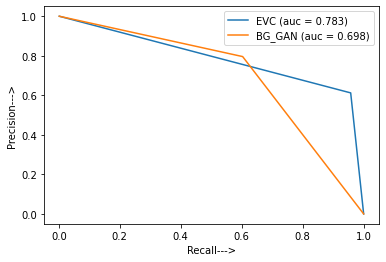

In [ ]:
evc_fpr, evc_tpr, threshold = precision_recall_curve(y_test, prediction_evc)
auc_evc = auc(evc_fpr, evc_tpr)

evc_fpr_GAN, evc_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_evc_SMOTE)
auc_evc_GAN = auc(evc_fpr_GAN, evc_tpr_GAN)

plt.plot(evc_fpr, evc_tpr, linestyle='-', label='EVC (auc = %0.3f)' % auc_evc)
plt.plot(evc_fpr_GAN, evc_tpr_GAN, linestyle='-', label='BG_GAN (auc = %0.3f)' % auc_evc_GAN)
plt.xlabel('Recall--->')
plt.ylabel('Precision--->')

plt.legend()

plt.show()

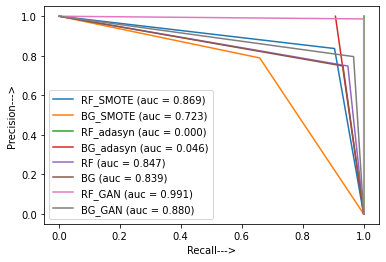

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
#from sklearn.metrics import plot_precision_recall_curve

RF_fpr_SMOTE, RF_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_rf_SMOTE)
auc_rf_SMOTE = auc(RF_fpr_SMOTE, RF_tpr_SMOTE)

BG_fpr_SMOTE, BG_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_bg_SMOTE)
auc_bg_SMOTE = auc(BG_fpr_SMOTE, BG_tpr_SMOTE)

RF_fpr_adasyn, RF_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_rf_ada)
auc_rf_adasyn = auc(RF_fpr_adasyn, RF_tpr_adasyn)

BG_fpr_adasyn, BG_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_bg_ada)
auc_bg_adasyn = auc(BG_fpr_adasyn, BG_tpr_adasyn)

RF_fpr, RF_tpr, threshold = precision_recall_curve(y_test, prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)

BG_fpr, BG_tpr, threshold = precision_recall_curve(y_test, prediction_bg)
auc_BG = auc(BG_fpr, BG_tpr)


#logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, threshold = roc_curve(y_test, prediction_GAN_1L)
#auc_logistic_GAN_1L = auc(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L)

RF_fpr_GAN, RF_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_GAN_rf)
auc_RF_GAN = auc(RF_fpr_GAN, RF_tpr_GAN)

BG_fpr_GAN, BG_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_GAN_bg)
auc_BG_GAN = auc(BG_fpr_GAN, BG_tpr_GAN)

plt.plot(RF_fpr_SMOTE, RF_tpr_SMOTE, linestyle='-', label='RF_SMOTE (auc = %0.3f)' % auc_rf_SMOTE)
plt.plot(BG_fpr_SMOTE, BG_tpr_SMOTE, linestyle='-', label='BG_SMOTE (auc = %0.3f)' % auc_bg_SMOTE)
plt.plot(RF_fpr_adasyn, RF_tpr_adasyn, linestyle='-', label='RF_adasyn (auc = %0.3f)' % auc_rf_adasyn)
plt.plot(BG_fpr_adasyn, BG_tpr_adasyn, linestyle='-', label='BG_adasyn (auc = %0.3f)' % auc_bg_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(BG_fpr, BG_tpr, linestyle='-', label='BG (auc = %0.3f)' % auc_BG)
plt.plot(RF_fpr_GAN, RF_tpr_GAN, linestyle='-', label='RF_GAN (auc = %0.3f)' % auc_RF_GAN)
plt.plot(BG_fpr_GAN, BG_tpr_GAN, linestyle='-', label='BG_GAN (auc = %0.3f)' % auc_BG_GAN)
plt.xlabel('Recall--->')
plt.ylabel('Precision--->')

plt.legend()

plt.show()

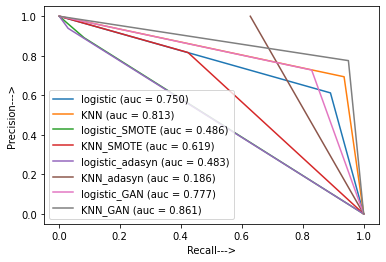

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
#from sklearn.metrics import plot_precision_recall_curve

logistic_fpr, logistic_tpr, threshold = precision_recall_curve(y_test, prediction_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

KNN_fpr, KNN_tpr, threshold = precision_recall_curve(y_test, prediction_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)

logistic_fpr_SMOTE, logistic_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_SMOTE_lr)
auc_logistic_SMOTE = auc(logistic_fpr_SMOTE, logistic_tpr_SMOTE)

KNN_fpr_SMOTE, KNN_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_SMOTE_KNN)
auc_KNN_SMOTE = auc(KNN_fpr_SMOTE, KNN_tpr_SMOTE)

logistic_fpr_adasyn, logistic_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_ada_lr)
auc_logistic_adasyn = auc(logistic_fpr_adasyn, logistic_tpr_adasyn)

KNN_fpr_adasyn, KNN_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_ada_KNN)
auc_KNN_adasyn = auc(KNN_fpr_adasyn, KNN_tpr_adasyn)

logistic_fpr_GAN, logistic_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_GAN_lr)
auc_logistic_GAN = auc(logistic_fpr_GAN, logistic_tpr_GAN)

KNN_fpr_GAN, KNN_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_GAN_KNN)
auc_KNN_GAN = auc(KNN_fpr_GAN, KNN_tpr_GAN)

plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='logistic (auc = %0.3f)' % auc_logistic)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_SMOTE, logistic_tpr_SMOTE, linestyle='-', label='logistic_SMOTE (auc = %0.3f)' % auc_logistic_SMOTE)
plt.plot(KNN_fpr_SMOTE, KNN_tpr_SMOTE, linestyle='-', label='KNN_SMOTE (auc = %0.3f)' % auc_KNN_SMOTE)
plt.plot(logistic_fpr_adasyn, logistic_tpr_adasyn, linestyle='-', label='logistic_adasyn (auc = %0.3f)' % auc_logistic_adasyn)
plt.plot(KNN_fpr_adasyn, KNN_tpr_adasyn, linestyle='-', label='KNN_adasyn (auc = %0.3f)' % auc_KNN_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_GAN, logistic_tpr_GAN, linestyle='-', label='logistic_GAN (auc = %0.3f)' % auc_logistic_GAN)
plt.plot(KNN_fpr_GAN, KNN_tpr_GAN, linestyle='-', label='KNN_GAN (auc = %0.3f)' % auc_KNN_GAN)
plt.xlabel('Recall--->')
plt.ylabel('Precision--->')

plt.legend()

plt.show()

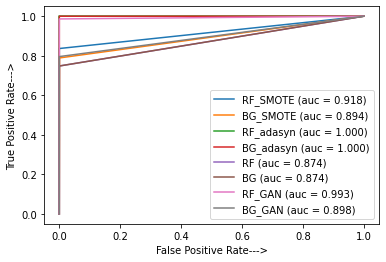

In [ ]:
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import plot_precision_recall_curve

RF_fpr_SMOTE, RF_tpr_SMOTE, threshold = roc_curve(y_test, prediction_rf_SMOTE)
auc_rf_SMOTE = auc(RF_fpr_SMOTE, RF_tpr_SMOTE)

BG_fpr_SMOTE, BG_tpr_SMOTE, threshold = roc_curve(y_test, prediction_bg_SMOTE)
auc_bg_SMOTE = auc(BG_fpr_SMOTE, BG_tpr_SMOTE)

RF_fpr_adasyn, RF_tpr_adasyn, threshold = roc_curve(y_test, prediction_rf_ada)
auc_rf_adasyn = auc(RF_fpr_adasyn, RF_tpr_adasyn)

BG_fpr_adasyn, BG_tpr_adasyn, threshold = roc_curve(y_test, prediction_bg_ada)
auc_bg_adasyn = auc(BG_fpr_adasyn, BG_tpr_adasyn)

RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)

BG_fpr, BG_tpr, threshold = roc_curve(y_test, prediction_bg)
auc_BG = auc(BG_fpr, BG_tpr)


#logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, threshold = roc_curve(y_test, prediction_GAN_1L)
#auc_logistic_GAN_1L = auc(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L)

RF_fpr_GAN, RF_tpr_GAN, threshold = roc_curve(y_test, prediction_GAN_rf)
auc_RF_GAN = auc(RF_fpr_GAN, RF_tpr_GAN)

BG_fpr_GAN, BG_tpr_GAN, threshold = roc_curve(y_test, prediction_GAN_bg)
auc_BG_GAN = auc(BG_fpr_GAN, BG_tpr_GAN)

plt.plot(RF_fpr_SMOTE, RF_tpr_SMOTE, linestyle='-', label='RF_SMOTE (auc = %0.3f)' % auc_rf_SMOTE)
plt.plot(BG_fpr_SMOTE, BG_tpr_SMOTE, linestyle='-', label='BG_SMOTE (auc = %0.3f)' % auc_bg_SMOTE)
plt.plot(RF_fpr_adasyn, RF_tpr_adasyn, linestyle='-', label='RF_adasyn (auc = %0.3f)' % auc_rf_adasyn)
plt.plot(BG_fpr_adasyn, BG_tpr_adasyn, linestyle='-', label='BG_adasyn (auc = %0.3f)' % auc_bg_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(BG_fpr, BG_tpr, linestyle='-', label='BG (auc = %0.3f)' % auc_BG)
plt.plot(RF_fpr_GAN, RF_tpr_GAN, linestyle='-', label='RF_GAN (auc = %0.3f)' % auc_RF_GAN)
plt.plot(BG_fpr_GAN, BG_tpr_GAN, linestyle='-', label='BG_GAN (auc = %0.3f)' % auc_BG_GAN)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')

plt.legend()

plt.show()

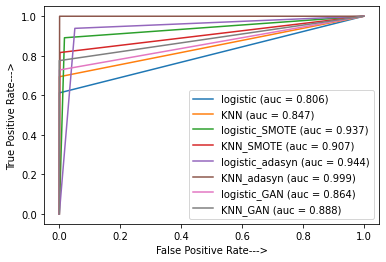

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, prediction_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, prediction_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)

logistic_fpr_SMOTE, logistic_tpr_SMOTE, threshold = roc_curve(y_test, prediction_SMOTE_lr)
auc_logistic_SMOTE = auc(logistic_fpr_SMOTE, logistic_tpr_SMOTE)

KNN_fpr_SMOTE, KNN_tpr_SMOTE, threshold = roc_curve(y_test, prediction_SMOTE_KNN)
auc_KNN_SMOTE = auc(KNN_fpr_SMOTE, KNN_tpr_SMOTE)

logistic_fpr_adasyn, logistic_tpr_adasyn, threshold = roc_curve(y_test, prediction_ada_lr)
auc_logistic_adasyn = auc(logistic_fpr_adasyn, logistic_tpr_adasyn)

KNN_fpr_adasyn, KNN_tpr_adasyn, threshold = roc_curve(y_test, prediction_ada_KNN)
auc_KNN_adasyn = auc(KNN_fpr_adasyn, KNN_tpr_adasyn)

logistic_fpr_GAN, logistic_tpr_GAN, threshold = roc_curve(y_test, prediction_GAN_lr)
auc_logistic_GAN = auc(logistic_fpr_GAN, logistic_tpr_GAN)

KNN_fpr_GAN, KNN_tpr_GAN, threshold = roc_curve(y_test, prediction_GAN_KNN)
auc_KNN_GAN = auc(KNN_fpr_GAN, KNN_tpr_GAN)

plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='logistic (auc = %0.3f)' % auc_logistic)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_SMOTE, logistic_tpr_SMOTE, linestyle='-', label='logistic_SMOTE (auc = %0.3f)' % auc_logistic_SMOTE)
plt.plot(KNN_fpr_SMOTE, KNN_tpr_SMOTE, linestyle='-', label='KNN_SMOTE (auc = %0.3f)' % auc_KNN_SMOTE)
plt.plot(logistic_fpr_adasyn, logistic_tpr_adasyn, linestyle='-', label='logistic_adasyn (auc = %0.3f)' % auc_logistic_adasyn)
plt.plot(KNN_fpr_adasyn, KNN_tpr_adasyn, linestyle='-', label='KNN_adasyn (auc = %0.3f)' % auc_KNN_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_GAN, logistic_tpr_GAN, linestyle='-', label='logistic_GAN (auc = %0.3f)' % auc_logistic_GAN)
plt.plot(KNN_fpr_GAN, KNN_tpr_GAN, linestyle='-', label='KNN_GAN (auc = %0.3f)' % auc_KNN_GAN)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')

plt.legend()

plt.show()